## Day 83 Lecture 2 Assignment

In this assignment, we will learn about Spark and MLLib.




Update the Google Compute Engine.

In [1]:
! apt-get update

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [

Run the cells below to start a spark session.

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
!tar xf spark-2.4.6-bin-hadoop2.7.tgz

Set up the environmental variables.

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.6-bin-hadoop2.7"

Install Pyspark. ***Note: The version must match the version of Spark that you have installed earlier***.

In [4]:
!pip install -q findspark
!pip install pyspark==2.4.6

     |████████████████████████████████| 218.4MB 72kB/s 
     |████████████████████████████████| 204kB 35.9MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.6-py2.py3-none-any.whl size=218814406 sha256=8df0eb3cc3a8b12b43960e1a6d158d394fcf50f487d7862f1a789755b30210ff
  Stored in directory: /root/.cache/pip/wheels/1e/5e/6a/17e906c94ec7246f260330a66e44a06a0809033ba2738a74a8
Successfully built pyspark


Download and save the video games sales CSV file to your Colab Data folder on Google Drive. 

The file can be downloaded from link [here](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Big%20Data/Video_Games_Sales_as_at_22_Dec_2016.csv), download it and save it to your Google Colab Data folder on gdrive.


Mount your Google drive for access in Google Colab Notebooks.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Change your directory to the Colab Data folder where you saved the CSV file.

In [7]:
os.chdir('/content/drive/MyDrive/Spark')

Set your local session.

In [8]:
APP_NAME = "Day83"
SPARK_URL = "local[*]"

Run the cells below to start a spark session.

In [9]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName(APP_NAME).getOrCreate()

List all the files in your directory.

In [10]:
# Answer below:
os.listdir()

['Video_Games_Sales_as_at_22_Dec_2016.csv']

Load the CSV file as a Spark dataframe.

In [11]:
video = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("Video_Games_Sales_as_at_22_Dec_2016.csv")

Review the data by applying the show command.

In [13]:
# Answer below:
video.show(n=10)

+--------------------+--------+---------------+------------+---------+--------+--------+--------+-----------+------------+------------+------------+----------+----------+---------+------+
|                Name|Platform|Year_of_Release|       Genre|Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|Critic_Score|Critic_Count|User_Score|User_Count|Developer|Rating|
+--------------------+--------+---------------+------------+---------+--------+--------+--------+-----------+------------+------------+------------+----------+----------+---------+------+
|          Wii Sports|     Wii|           2006|      Sports| Nintendo|   41.36|   28.96|    3.77|       8.45|       82.53|          76|          51|         8|       322| Nintendo|     E|
|   Super Mario Bros.|     NES|           1985|    Platform| Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|        null|        null|      null|      null|     null|  null|
|      Mario Kart Wii|     Wii|           2008|      Racing|

In [19]:
type(video)

pyspark.sql.dataframe.DataFrame

We will predict global sales using a number of variables in this dataset. We will start by removing all missing data (though we know that this will make the dataset significantly smaller). Drop all the missing values using dropna.

In [16]:
# Answer below:
#target = video.GlobalSales

clean_video = video.dropna(how='any')

In [18]:
type(clean_video)

pyspark.sql.dataframe.DataFrame

Get the unique values for Genre.


In [26]:
len(clean_video.select('Genre').distinct().collect())

12

In [17]:
distinct_g = [x.Genre for x in clean_video.select('Genre').distinct().collect()]
len(distinct_g)

12

Next, we will create dummy variables for the genre. Create these variables using the `OneHotEncoder` provided in spark.

In [29]:
# Answer below:


from pyspark.ml.feature import OneHotEncoder, StringIndexer

stringIndexer = StringIndexer(inputCol="Genre", outputCol="GenreIndex")
model = stringIndexer.fit(clean_video)
indexed = model.transform(clean_video)
encoder = OneHotEncoder( inputCol="GenreIndex", outputCol="GenreVec")
encoded = encoder.transform(indexed)

In [30]:
encoded.show()

+--------------------+--------+---------------+--------+--------------------+--------+--------+--------+-----------+------------+------------+------------+----------+----------+--------------------+------+----------+--------------+
|                Name|Platform|Year_of_Release|   Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|Critic_Score|Critic_Count|User_Score|User_Count|           Developer|Rating|GenreIndex|      GenreVec|
+--------------------+--------+---------------+--------+--------------------+--------+--------+--------+-----------+------------+------------+------------+----------+----------+--------------------+------+----------+--------------+
|          Wii Sports|     Wii|           2006|  Sports|            Nintendo|   41.36|   28.96|    3.77|       8.45|       82.53|          76|          51|         8|       322|            Nintendo|     E|       1.0|(11,[1],[1.0])|
|      Mario Kart Wii|     Wii|           2008|  Racing|            Nint

Convert the critic score and the user score to a number between 0 and 1 by dividing by 100. 

In [37]:
max_value = encoded.agg({"User_score": "max"}).collect()[0][0]
max_value

'9.6'

In [42]:
# Answer below:

from pyspark.sql.functions import lit, col

video_percent = encoded.withColumn('Critic_Score', encoded.Critic_Score / 100)
video_percent1 = video_percent.withColumn('User_Score', video_percent.User_Score / 10)
video_percent1.show(n=10)

+--------------------+--------+---------------+--------+--------------------+--------+--------+--------+-----------+------------+------------+------------+------------------+----------+-------------------+------+----------+--------------+
|                Name|Platform|Year_of_Release|   Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|Critic_Score|Critic_Count|        User_Score|User_Count|          Developer|Rating|GenreIndex|      GenreVec|
+--------------------+--------+---------------+--------+--------------------+--------+--------+--------+-----------+------------+------------+------------+------------------+----------+-------------------+------+----------+--------------+
|          Wii Sports|     Wii|           2006|  Sports|            Nintendo|   41.36|   28.96|    3.77|       8.45|       82.53|        0.76|          51|               0.8|       322|           Nintendo|     E|       1.0|(11,[1],[1.0])|
|      Mario Kart Wii|     Wii|           20

Using the vector assembler, create a vector of features using the scaled user score, the scaled critic score and the one hot encoded vector.

In [46]:
# Answer below:

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

feature_cols = ['Critic_Score', 'User_Score', 'GenreVec']

assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
video_features = assembler.transform(video_percent1)

In [49]:
video_features.show(10)

+--------------------+--------+---------------+--------+--------------------+--------+--------+--------+-----------+------------+------------+------------+------------------+----------+-------------------+------+----------+--------------+--------------------+
|                Name|Platform|Year_of_Release|   Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|Critic_Score|Critic_Count|        User_Score|User_Count|          Developer|Rating|GenreIndex|      GenreVec|            features|
+--------------------+--------+---------------+--------+--------------------+--------+--------+--------+-----------+------------+------------+------------+------------------+----------+-------------------+------+----------+--------------+--------------------+
|          Wii Sports|     Wii|           2006|  Sports|            Nintendo|   41.36|   28.96|    3.77|       8.45|       82.53|        0.76|          51|               0.8|       322|           Nintendo|     E|       1

Split the data into 70% in the training sample and 30% in the test sample.

In [56]:
feature_vectors = video_features['features', 'Global_Sales']
feature_vectors.show()

+--------------------+------------+
|            features|Global_Sales|
+--------------------+------------+
|(13,[0,1,3],[0.76...|       82.53|
|(13,[0,1,6],[0.82...|       35.52|
|(13,[0,1,3],[0.8,...|       32.77|
|(13,[0,1,7],[0.89...|        29.8|
|(13,[0,1,8],[0.58...|       28.92|
|(13,[0,1,7],[0.87...|       28.32|
|(13,[0,1,6],[0.91...|       23.21|
|(13,[0,1,3],[0.8,...|        22.7|
|(13,[0,1,8],[0.61...|       21.81|
|(13,[0,1,3],[0.8,...|       21.79|
|(13,[0,1,2],[0.97...|       21.04|
|(13,[0,1,2],[0.95...|       20.81|
|(13,[0,1,8],[0.77...|       20.15|
|(13,[0,1,2],[0.97...|       16.27|
|(13,[0,1,2],[0.95...|       16.15|
|(13,[0,1],[0.77,0...|       15.29|
|(13,[0,1,6],[0.95...|       14.98|
|(13,[0,1,4],[0.88...|       14.73|
|(13,[0,1,4],[0.87...|       14.61|
|(13,[0,1,4],[0.83...|       13.79|
+--------------------+------------+
only showing top 20 rows



In [57]:
# Answer below:
train, test = feature_vectors.randomSplit([0.7, 0.3], seed=1) # train_test_split
train.show(10)

+--------------------+------------+
|            features|Global_Sales|
+--------------------+------------+
|(13,[0,1],[0.25,0...|         0.1|
|(13,[0,1],[0.28,0...|         0.1|
|(13,[0,1],[0.34,0...|        0.04|
|(13,[0,1],[0.37,0...|        0.04|
|(13,[0,1],[0.39,0...|        0.15|
|(13,[0,1],[0.41,0...|        0.13|
|(13,[0,1],[0.44,0...|        2.08|
|(13,[0,1],[0.45,0...|        0.08|
|(13,[0,1],[0.45,0...|        0.03|
|(13,[0,1],[0.49,0...|        0.31|
+--------------------+------------+
only showing top 10 rows



## Linear Regression

Using the train and test data, generate a linear regression to predict global sales. Print the r squared from the model summary.

In [62]:
# Answer below:

from pyspark.ml.regression import LinearRegression

lr = LinearRegression(labelCol='Global_Sales', featuresCol='features')

# Fit the model
lr_model = lr.fit(train)

# Summarize the model over the training set and print out some metrics
print(f'R^2: ', lr_model.summary.r2)
print(f'R^2 Adjusted: ', lr_model.summary.r2adj)

R^2:  0.09047026460475105
R^2 Adjusted:  0.0880187019756532


Calculate the RMSE

In [63]:
print(f'RMSE: ', lr_model.summary.rootMeanSquaredError) 

RMSE:  1.586348634929327


## Classification - Binomial Logistic Regression

Download and save the college admission  CSV file to your Colab Data folder on Google Drive. 

The file can be downloaded from link [here](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Admission_Predict.csv), download it and save it to your Google Colab Data folder on gdrive.

Load the admit CSV file in to the spark instance.

In [65]:
# Answer below:
admit = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("Admission_Predict.csv")
admit.show(10)

+----------+---------+-----------+-----------------+---+----+----+--------+----------------+
|Serial No.|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |
+----------+---------+-----------+-----------------+---+----+----+--------+----------------+
|         1|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|
|         2|      324|        107|                4|4.0| 4.5|8.87|       1|            0.76|
|         3|      316|        104|                3|3.0| 3.5| 8.0|       1|            0.72|
|         4|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|
|         5|      314|        103|                2|2.0| 3.0|8.21|       0|            0.65|
|         6|      330|        115|                5|4.5| 3.0|9.34|       1|             0.9|
|         7|      321|        109|                3|3.0| 4.0| 8.2|       1|            0.75|
|         8|      308|        101|                2|3.0| 4.0| 7.9|    

In [66]:
admit.printSchema()

root
 |-- Serial No.: integer (nullable = true)
 |-- GRE Score: integer (nullable = true)
 |-- TOEFL Score: integer (nullable = true)
 |-- University Rating: integer (nullable = true)
 |-- SOP: double (nullable = true)
 |-- LOR : double (nullable = true)
 |-- CGPA: double (nullable = true)
 |-- Research: integer (nullable = true)
 |-- Chance of Admit : double (nullable = true)



Create a categorical response from `Chance of Admit` column.

In [69]:
admit.columns

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [70]:
max_value = admit.agg({"Chance of Admit ": "max"}).collect()[0][0]
max_value

0.97

In [73]:
from pyspark.ml.feature import Binarizer
# Answer below:

binarizer = Binarizer(threshold=0.5, inputCol='Chance of Admit ', outputCol='binarizedChanceOfAdmit')
binarizedDataFrame = binarizer.transform(admit)
binarizedDataFrame.show(10)

+----------+---------+-----------+-----------------+---+----+----+--------+----------------+----------------------+
|Serial No.|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |binarizedChanceOfAdmit|
+----------+---------+-----------+-----------------+---+----+----+--------+----------------+----------------------+
|         1|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|                   1.0|
|         2|      324|        107|                4|4.0| 4.5|8.87|       1|            0.76|                   1.0|
|         3|      316|        104|                3|3.0| 3.5| 8.0|       1|            0.72|                   1.0|
|         4|      322|        110|                3|3.5| 2.5|8.67|       1|             0.8|                   1.0|
|         5|      314|        103|                2|2.0| 3.0|8.21|       0|            0.65|                   1.0|
|         6|      330|        115|                5|4.5| 3.0|9.34|      

Divide GRE and TOEFL score columns by 100 to normalize the features.

In [78]:
from pyspark.sql.functions import lit, col
# Answer below:

gre_norm = binarizedDataFrame.withColumn('GRE_Score_Normalized', binarizedDataFrame['GRE Score'] / 100)
norm_df = gre_norm.withColumn('TOEFL_Score_Normalized', gre_norm['TOEFL Score'] / 100)
norm_df.show(3)

+----------+---------+-----------+-----------------+---+----+----+--------+----------------+----------------------+--------------------+----------------------+
|Serial No.|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |binarizedChanceOfAdmit|GRE_Score_Normalized|TOEFL_Score_Normalized|
+----------+---------+-----------+-----------------+---+----+----+--------+----------------+----------------------+--------------------+----------------------+
|         1|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|                   1.0|                3.37|                  1.18|
|         2|      324|        107|                4|4.0| 4.5|8.87|       1|            0.76|                   1.0|                3.24|                  1.07|
|         3|      316|        104|                3|3.0| 3.5| 8.0|       1|            0.72|                   1.0|                3.16|                  1.04|
+----------+---------+-----------+------

Vectorize the features using the vector assembler, saving them into a column named features.

In [89]:
# Answer below:
feature_cols = [x for x in norm_df.columns if x not in ['Serial No.', 'GRE Score', 'TOEFL Score', 'Chance of Admit ', 'binarizedChanceOfAdmit']]

assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
admit_features = assembler.transform(norm_df)
admit_features.show(3)

+----------+---------+-----------+-----------------+---+----+----+--------+----------------+----------------------+--------------------+----------------------+--------------------+
|Serial No.|GRE Score|TOEFL Score|University Rating|SOP|LOR |CGPA|Research|Chance of Admit |binarizedChanceOfAdmit|GRE_Score_Normalized|TOEFL_Score_Normalized|            features|
+----------+---------+-----------+-----------------+---+----+----+--------+----------------+----------------------+--------------------+----------------------+--------------------+
|         1|      337|        118|                4|4.5| 4.5|9.65|       1|            0.92|                   1.0|                3.37|                  1.18|[4.0,4.5,4.5,9.65...|
|         2|      324|        107|                4|4.0| 4.5|8.87|       1|            0.76|                   1.0|                3.24|                  1.07|[4.0,4.0,4.5,8.87...|
|         3|      316|        104|                3|3.0| 3.5| 8.0|       1|            0.72|   

Split into train and test subsets.

In [90]:
admit_feature_vectors = admit_features['features', 'binarizedChanceOfAdmit']
admit_feature_vectors.show(3)

+--------------------+----------------------+
|            features|binarizedChanceOfAdmit|
+--------------------+----------------------+
|[4.0,4.5,4.5,9.65...|                   1.0|
|[4.0,4.0,4.5,8.87...|                   1.0|
|[3.0,3.0,3.5,8.0,...|                   1.0|
+--------------------+----------------------+
only showing top 3 rows



In [91]:
# Answer below:
train, test = admit_feature_vectors.randomSplit([0.7, 0.3], seed=1) # train_test_split
train.show(10)

+--------------------+----------------------+
|            features|binarizedChanceOfAdmit|
+--------------------+----------------------+
|[1.0,1.0,1.0,7.34...|                   0.0|
|[1.0,1.0,1.5,8.01...|                   1.0|
|[1.0,1.0,2.0,7.8,...|                   1.0|
|[1.0,1.0,2.5,7.46...|                   1.0|
|[1.0,1.5,1.5,7.64...|                   0.0|
|[1.0,1.5,2.0,7.36...|                   0.0|
|[1.0,1.5,2.0,7.43...|                   0.0|
|[1.0,1.5,2.0,7.56...|                   0.0|
|[1.0,1.5,2.0,7.86...|                   1.0|
|[1.0,1.5,2.0,7.9,...|                   1.0|
+--------------------+----------------------+
only showing top 10 rows



Define the Logistic regression model.

In [92]:
from pyspark.ml.classification import LogisticRegression
logr = LogisticRegression(featuresCol="features", labelCol="binarizedChanceOfAdmit",)

Fit the model.

In [93]:
# Answer below
log_model = logr.fit(train)

predict in the test set.

In [94]:
# Answer below
predictions = log_model.transform(test)

In [97]:
predictions.show(3)

+--------------------+----------------------+--------------------+--------------------+----------+
|            features|binarizedChanceOfAdmit|       rawPrediction|         probability|prediction|
+--------------------+----------------------+--------------------+--------------------+----------+
|[1.0,1.0,2.5,8.01...|                   1.0|[-3.1248169306794...|[0.04209510922136...|       1.0|
|[1.0,1.5,2.0,7.89...|                   1.0|[-1.6923610109993...|[0.15546559649439...|       1.0|
|[1.0,2.0,2.0,7.88...|                   1.0|[-0.0067220737564...|[0.49831948788889...|       1.0|
+--------------------+----------------------+--------------------+--------------------+----------+
only showing top 3 rows



Plot the ROC.

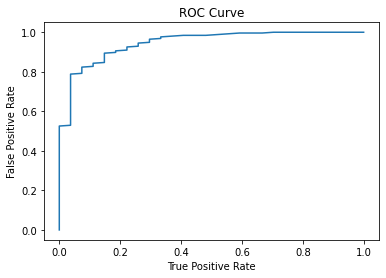

Training set areaUnderROC: 0.9453159041394334


In [95]:
import matplotlib.pyplot as plt

trainingSummary = log_model.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

Calculate the overall model accuracy using the model evaluator.


In [100]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Answer below:
evaluator = MulticlassClassificationEvaluator(labelCol='binarizedChanceOfAdmit', predictionCol='prediction', metricName='accuracy')
#eval = MulticlassClassificationEvaluator(labelCol='Chance of Admit_binarized', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print("Test Accuracy - %g" % (accuracy))

Test Accuracy - 0.940678


## Classification - Random Forest

Download and save the land cover type CSV file to your Colab Data folder on Google Drive. 

The file can be downloaded from link [here](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Big%20Data/covtype.csv), download it and save it to your Google Colab Data folder on gdrive.

Load the land cover type data from this CSV file.

In [104]:
import os
os.listdir()

['Video_Games_Sales_as_at_22_Dec_2016.csv',
 'Admission_Predict.csv',
 'covtype.csv']

In [105]:
#Answer below:
cover = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("covtype.csv")
cover.show(3)

+---------+------+-----+--------------------------------+------------------------------+-------------------------------+-------------+--------------+-------------+----------------------------------+----------------+----------------+----------------+----------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----------+
|Elevation|Aspect|Slope|Horizontal_Distance_To_Hydrology|Vertical_Distance_To_Hydrology|Horizontal_Distance_To_Roadways|Hillshade_9am|Hillshade_Noon|Hillshade_3pm|Horizontal_Distance_To_Fire_Points|Wilderness_Area1|Wilderness_Area2|Wilderness_Area3|Wi

In [106]:
#load modules
# !!!!caution: not from pyspark.mllib.linalg import Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml import Pipeline
from pyspark.ml.feature import IndexToString,StringIndexer, VectorIndexer
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

Vectorize the features to a single column called features using a lambda function.

In [107]:
cover.columns

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Cover_Type']

In [110]:
#Answer below:
feature_cols = [x for x in cover.columns if x not in 'Cover_Type']

assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
cover_features = assembler.transform(cover)
cover_features.show(3)

+---------+------+-----+--------------------------------+------------------------------+-------------------------------+-------------+--------------+-------------+----------------------------------+----------------+----------------+----------------+----------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----------+--------------------+
|Elevation|Aspect|Slope|Horizontal_Distance_To_Hydrology|Vertical_Distance_To_Hydrology|Horizontal_Distance_To_Roadways|Hillshade_9am|Hillshade_Noon|Hillshade_3pm|Horizontal_Distance_To_Fire_Points|Wilderness_Area1|Wilderness_Area

In [114]:
cover_feature_vectors = cover_features['features', 'Cover_Type']
cover_feature_vectors.show(3)

+--------------------+----------+
|            features|Cover_Type|
+--------------------+----------+
|(54,[0,1,2,3,5,6,...|         5|
|(54,[0,1,2,3,4,5,...|         5|
|(54,[0,1,2,3,4,5,...|         2|
+--------------------+----------+
only showing top 3 rows



In [116]:
# Split the data into training and test sets (40% held out for testing)
#Answer below:

train, test = cover_feature_vectors.randomSplit([0.6, 0.4], seed=1) # train_test_split
train.show(3)

+--------------------+----------+
|            features|Cover_Type|
+--------------------+----------+
|(54,[0,1,2,3,4,5,...|         2|
|(54,[0,1,2,3,4,5,...|         2|
|(54,[0,1,2,3,4,5,...|         2|
+--------------------+----------+
only showing top 3 rows



In [118]:
from pyspark.ml.classification import RandomForestClassifier

# Define a RandomForest model.
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'Cover_Type')
rfModel = rf.fit(train)

Fit the model and predict on the test data.

In [119]:
#Answer below:
predictions = rfModel.transform(test)
predictions.show(10)

+--------------------+----------+--------------------+--------------------+----------+
|            features|Cover_Type|       rawPrediction|         probability|prediction|
+--------------------+----------+--------------------+--------------------+----------+
|(54,[0,1,2,3,4,5,...|         2|[0.0,5.3181771079...|[0.0,0.2659088553...|       2.0|
|(54,[0,1,2,3,4,5,...|         2|[0.0,5.3181771079...|[0.0,0.2659088553...|       2.0|
|(54,[0,1,2,3,4,5,...|         2|[0.0,5.3181771079...|[0.0,0.2659088553...|       2.0|
|(54,[0,1,2,3,4,5,...|         2|[0.0,5.3181771079...|[0.0,0.2659088553...|       2.0|
|(54,[0,1,2,3,4,5,...|         2|[0.0,5.3181771079...|[0.0,0.2659088553...|       2.0|
|(54,[0,1,2,3,4,5,...|         2|[0.0,5.3181771079...|[0.0,0.2659088553...|       2.0|
|(54,[0,1,2,3,4,5,...|         2|[0.0,5.3181771079...|[0.0,0.2659088553...|       2.0|
|(54,[0,1,2,3,4,5,...|         2|[0.0,5.3181771079...|[0.0,0.2659088553...|       2.0|
|(54,[0,1,2,3,4,5,...|         2|[0.0,5.318

Build a classification matrix to review the model preformance with the data test set.

In [120]:
from sklearn.metrics import confusion_matrix
#Answer below:

y_true = predictions.select('Cover_Type')
y_pred = predictions.select('prediction')

confusion_matrix(y_true.collect(), y_pred.collect())

array([[59234, 25496,     0,     0,     0,     0,     0],
       [22740, 89184,  1178,     0,     0,     0,     0],
       [    0,  5806,  8456,     0,     0,     0,     0],
       [    0,   200,   902,     0,     0,     0,     0],
       [    0,  3796,     0,     0,     0,     0,     0],
       [    0,  3060,  3778,     0,     0,     0,     0],
       [ 8172,    38,     0,     0,     0,     0,     0]])

In [121]:

evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='Cover_Type', metricName='accuracy')
evaluator.evaluate(predictions)

0.6760644716428202